In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
import pandas as pd
from scipy.stats import rankdata

In [2]:
C4_diff_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_rep1.npz")["C_syn_e"]
C4_nona_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_rep1.npz")["C_syn_e"]
C8_diff_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_rep1.npz")["C_syn_e"]
C8_nona_raw = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_rep1.npz")["C_syn_e"]
C12_diff_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_rep1.npz")["C_syn_e"]
C12_nona_raw = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_rep1.npz")["C_syn_e"]

C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]
C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:,-1]
C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:,-1]

C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_rep1.npz")["E_scale"]
C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_rep1.npz")["E_scale"]
C8_diff_scale = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_rep1.npz")["E_scale"]
C8_nona_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_rep1.npz")["E_scale"]
C12_diff_scale = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_rep1.npz")["E_scale"]
C12_nona_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_rep1.npz")["E_scale"]

In [3]:
C4_diff_idx = np.zeros((2000))
C4_nona_idx = np.zeros((2000))
C8_diff_idx = np.zeros((2000))
C8_nona_idx = np.zeros((2000))
C12_diff_idx = np.zeros((2000))
C12_nona_idx = np.zeros((2000))

for i in tnrange(2000):
    C4_diff_idx[i] = np.argmax(C4_diff_raw[:,i])
    C4_nona_idx[i] = np.argmax(C4_nona_raw[:,i])
    C8_diff_idx[i] = np.argmax(C8_diff_raw[:,i])
    C8_nona_idx[i] = np.argmax(C8_nona_raw[:,i])
    C12_diff_idx[i] = np.argmax(C12_diff_raw[:,i])
    C12_nona_idx[i] = np.argmax(C12_nona_raw[:,i])


<ipython-input-3-4c9d11e8e266>:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [4]:
C4_diff = np.zeros((2000,2000))
C4_nona = np.zeros((2000,2000))
C8_diff = np.zeros((2000,2000))
C8_nona = np.zeros((2000,2000))
C12_diff = np.zeros((2000,2000))
C12_nona = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        if C4_diff_idx[i] == C4_diff_idx[j]:
            C4_diff[i,j] = 1
            C4_diff[j,i] = 1
        if C4_nona_idx[i] == C4_nona_idx[j]:
            C4_nona[i,j] = 1
            C4_nona[j,i] = 1
        if C8_diff_idx[i] == C8_diff_idx[j]:
            C8_diff[i,j] = 1
            C8_diff[j,i] = 1
        if C8_nona_idx[i] == C8_nona_idx[j]:
            C8_nona[i,j] = 1
            C8_nona[j,i] = 1
        if C12_diff_idx[i] == C12_diff_idx[j]:
            C12_diff[i,j] = 1
            C12_diff[j,i] = 1
        if C12_nona_idx[i] == C12_nona_idx[j]:
            C12_nona[i,j] = 1
            C12_nona[j,i] = 1

######
######

C4_diff = 1 - C4_diff
C4_nona = 1 - C4_nona
C8_diff = 1 - C8_diff
C8_nona = 1 - C8_nona
C12_diff = 1 - C12_diff
C12_nona = 1 - C12_nona


<ipython-input-4-b459704463a9>:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [5]:
C4_clust_idx = np.zeros((2000))
C8_clust_idx = np.zeros((2000))
C12_clust_idx = np.zeros((2000))

for i in range(4):
    C4_clust_idx[880+60*i:880+60*(i+1)] = i+1
for i in range(8):
    C8_clust_idx[880+30*i:880+30*(i+1)] = i+1
for i in range(12):
    C12_clust_idx[880+20*i:880+20*(i+1)] = i+1
    
C4_clust = np.zeros((2000,2000))
C8_clust = np.zeros((2000,2000))
C12_clust = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        if C4_clust_idx[i] == C4_clust_idx[j]:
            C4_clust[i,j] = 1
            C4_clust[j,i] = 1
        if C8_clust_idx[i] == C8_clust_idx[j]:
            C8_clust[i,j] = 1
            C8_clust[j,i] = 1
        if C12_clust_idx[i] == C12_clust_idx[j]:
            C12_clust[i,j] = 1
            C12_clust[j,i] = 1

<ipython-input-5-92c970fbc6c6>:16: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [6]:
C4_dist = np.zeros((2000,2000))
C8_dist = np.zeros((2000,2000))
C12_dist = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        C4_dist[i,j] = np.abs(C4_dist_raw[i] - C4_dist_raw[j])
        C8_dist[i,j] = np.abs(C8_dist_raw[i] - C8_dist_raw[j])
        C12_dist[i,j] = np.abs(C12_dist_raw[i] - C12_dist_raw[j])

<ipython-input-6-e900bb5569b8>:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

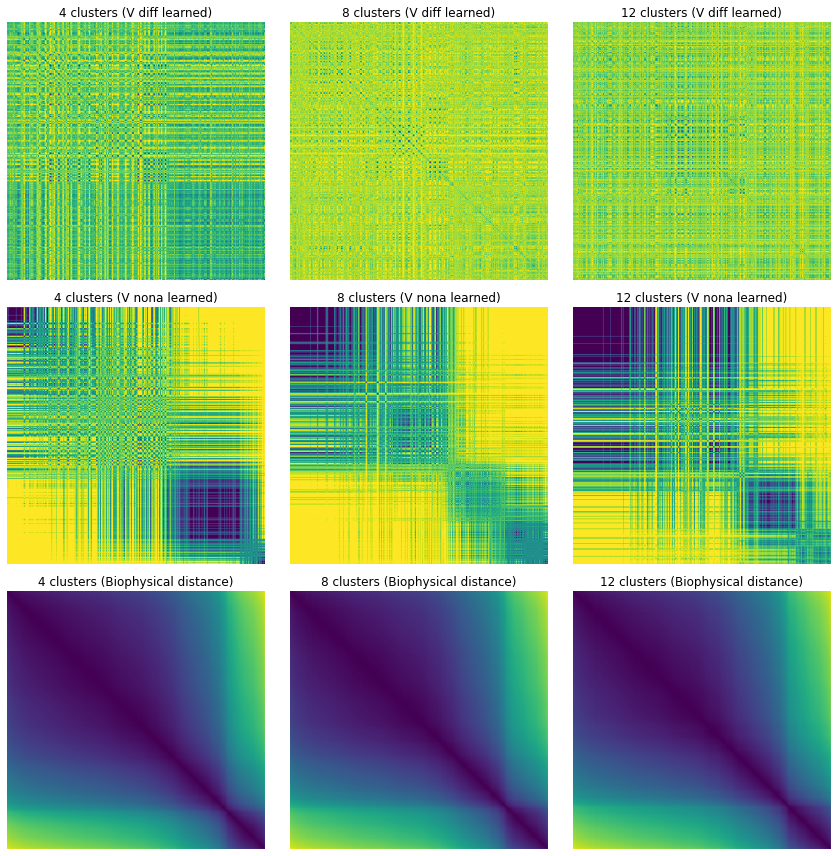

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (12,12))

C4_dist_ord = np.argsort(C4_dist_raw[:2000])
C8_dist_ord = np.argsort(C8_dist_raw[:2000])
C12_dist_ord = np.argsort(C12_dist_raw[:2000])

axs[0,0].imshow(C4_diff[:,C4_dist_ord][C4_dist_ord,:])
axs[0,1].imshow(C8_diff[:,C8_dist_ord][C8_dist_ord,:])
axs[0,2].imshow(C12_diff[:,C12_dist_ord][C12_dist_ord,:])
axs[1,0].imshow(C4_nona[:,C4_dist_ord][C4_dist_ord,:])
axs[1,1].imshow(C8_nona[:,C8_dist_ord][C8_dist_ord,:])
axs[1,2].imshow(C12_nona[:,C12_dist_ord][C12_dist_ord,:])

axs[2,0].imshow(C4_dist[:,C4_dist_ord][C4_dist_ord,:])
axs[2,1].imshow(C8_dist[:,C8_dist_ord][C8_dist_ord,:])
axs[2,2].imshow(C12_dist[:,C12_dist_ord][C12_dist_ord,:])
#axs[3,0].imshow(C4_clust, cmap="jet")
#axs[3,1].imshow(C8_clust, cmap="jet")
#axs[3,2].imshow(C12_clust, cmap="jet")


for i in range(3):
    for j in range(3):
        axs[i,j].axis("off")
        
axs[0,0].set_title("4 clusters (V diff learned)")
axs[0,1].set_title("8 clusters (V diff learned)")
axs[0,2].set_title("12 clusters (V diff learned)")
axs[1,0].set_title("4 clusters (V nona learned)")
axs[1,1].set_title("8 clusters (V nona learned)")
axs[1,2].set_title("12 clusters (V nona learned)")
axs[2,0].set_title("4 clusters (Biophysical distance)")
axs[2,1].set_title("8 clusters (Biophysical distance)")
axs[2,2].set_title("12 clusters (Biophysical distance)")

fig.tight_layout()
plt.show()

In [8]:
x, y = np.triu_indices(2000, k=0)

C4_diff_tri = C4_diff[x,y]
C4_nona_tri = C4_nona[x,y]
C8_diff_tri = C8_diff[x,y]
C8_nona_tri = C8_nona[x,y]
C12_diff_tri = C12_diff[x,y]
C12_nona_tri = C12_nona[x,y]

C4_dist_tri = C4_dist[x,y]
C8_dist_tri = C8_dist[x,y]
C12_dist_tri = C12_dist[x,y]

C4_diff_nona_corr, C4_diff_nona_p = scipy.stats.spearmanr(C4_diff_tri, C4_nona_tri)
C8_diff_nona_corr, C8_diff_nona_p = scipy.stats.spearmanr(C8_diff_tri, C8_nona_tri)
C12_diff_nona_corr, C12_diff_nona_p = scipy.stats.spearmanr(C12_diff_tri, C12_nona_tri)

C4_dist_diff_corr, C4_dist_diff_p = scipy.stats.spearmanr(C4_diff_tri, C4_dist_tri)
C8_dist_diff_corr, C8_dist_diff_p = scipy.stats.spearmanr(C8_diff_tri, C8_dist_tri)
C12_dist_diff_corr, C12_dist_diff_p = scipy.stats.spearmanr(C12_diff_tri, C12_dist_tri)

C4_dist_nona_corr, C4_dist_nona_p = scipy.stats.spearmanr(C4_nona_tri, C4_dist_tri)
C8_dist_nona_corr, C8_dist_nona_p = scipy.stats.spearmanr(C8_nona_tri, C8_dist_tri)
C12_dist_nona_corr, C12_dist_nona_p = scipy.stats.spearmanr(C12_nona_tri, C12_dist_tri)

print("V_diff learned vs. V_nona learned (4 clusters):", C4_diff_nona_corr)
print("V_diff learned vs. V_nona learned (8 clusters):", C8_diff_nona_corr)
print("V_diff learned vs. V_nona learned (12 clusters):", C12_diff_nona_corr)
print("----------")

print("Biophysical dist. vs. V_diff learned (4 clusters):", C4_dist_diff_corr)
print("Biophysical dist. vs. V_diff learned (8 clusters):", C8_dist_diff_corr)
print("Biophysical dist. vs. V_diff learned (12 clusters):", C12_dist_diff_corr)
print("----------")

print("Biophysical dist. vs. V_nona learned (4 clusters):", C4_dist_nona_corr)
print("Biophysical dist. vs. V_nona learned (8 clusters):", C8_dist_nona_corr)
print("Biophysical dist. vs. V_nona learned (12 clusters):", C12_dist_nona_corr)

V_diff learned vs. V_nona learned (4 clusters): 0.07834039566171826
V_diff learned vs. V_nona learned (8 clusters): 0.01983493494258506
V_diff learned vs. V_nona learned (12 clusters): 0.007878344265793369
----------
Biophysical dist. vs. V_diff learned (4 clusters): -0.019516076354481618
Biophysical dist. vs. V_diff learned (8 clusters): 0.012003605216613639
Biophysical dist. vs. V_diff learned (12 clusters): 0.02698635210533189
----------
Biophysical dist. vs. V_nona learned (4 clusters): 0.2323823747829261
Biophysical dist. vs. V_nona learned (8 clusters): 0.42020786772613
Biophysical dist. vs. V_nona learned (12 clusters): 0.40720453320820554


In [9]:
class WeightedCorr:
    def __init__(self, xyw=None, x=None, y=None, w=None, df=None, wcol=None):
        ''' Weighted Correlation class. Either supply xyw, (x, y, w), or (df, wcol). Call the class to get the result, i.e.:
        WeightedCorr(xyw=mydata[[x, y, w]])(method='pearson')
        :param xyw: pd.DataFrame with shape(n, 3) containing x, y, and w columns (column names irrelevant)
        :param x: pd.Series (n, ) containing values for x
        :param y: pd.Series (n, ) containing values for y
        :param w: pd.Series (n, ) containing weights
        :param df: pd.Dataframe (n, m+1) containing m phenotypes and a weight column
        :param wcol: str column of the weight column in the dataframe passed to the df argument.
        '''
        if (df is None) and (wcol is None):
            if np.all([i is None for i in [xyw, x, y, w]]):
                raise ValueError('No data supplied')
            if not ((isinstance(xyw, pd.DataFrame)) != (np.all([isinstance(i, pd.Series) for i in [x, y, w]]))):
                raise TypeError('xyw should be a pd.DataFrame, or x, y, w should be pd.Series')
            xyw = pd.concat([x, y, w], axis=1).dropna() if xyw is None else xyw.dropna()
            self.x, self.y, self.w = (pd.to_numeric(xyw[i], errors='coerce').values for i in xyw.columns)
            self.df = None
        elif (wcol is not None) and (df is not None):
            if (not isinstance(df, pd.DataFrame)) or (not isinstance(wcol, str)):
                raise ValueError('df should be a pd.DataFrame and wcol should be a string')
            if wcol not in df.columns:
                raise KeyError('wcol not found in column names of df')
            self.df = df.loc[:, [x for x in df.columns if x != wcol]]
            self.w = pd.to_numeric(df.loc[:, wcol], errors='coerce')
        else:
            raise ValueError('Incorrect arguments specified, please specify xyw, or (x, y, w) or (df, wcol)')

    def _wcov(self, x, y, ms):
        return np.sum(self.w * (x - ms[0]) * (y - ms[1]))

    def _pearson(self, x=None, y=None):
        x, y = (self.x, self.y) if ((x is None) and (y is None)) else (x, y)
        mx, my = (np.sum(i * self.w) / np.sum(self.w) for i in [x, y])
        return self._wcov(x, y, [mx, my]) / np.sqrt(self._wcov(x, x, [mx, mx]) * self._wcov(y, y, [my, my]))

    def _wrank(self, x):
        (unique, arr_inv, counts) = np.unique(rankdata(x), return_counts=True, return_inverse=True)
        a = np.bincount(arr_inv, self.w)
        return (np.cumsum(a) - a)[arr_inv]+((counts + 1)/2 * (a/counts))[arr_inv]

    def _spearman(self, x=None, y=None):
        x, y = (self.x, self.y) if ((x is None) and (y is None)) else (x, y)
        return self._pearson(self._wrank(x), self._wrank(y))

    def __call__(self, method='pearson'):
        '''
        :param method: Correlation method to be used: 'pearson' for pearson r, 'spearman' for spearman rank-order correlation.
        :return: if xyw, or (x, y, w) were passed to __init__ returns the correlation value (float).
                 if (df, wcol) were passed to __init__ returns a pd.DataFrame (m, m), the correlation matrix.
        '''
        if method not in ['pearson', 'spearman']:
            raise ValueError('method should be one of [\'pearson\', \'spearman\']')
        cor = {'pearson': self._pearson, 'spearman': self._spearman}[method]
        if self.df is None:
            return cor()
        else:
            out = pd.DataFrame(np.nan, index=self.df.columns, columns=self.df.columns)
            for i, x in enumerate(self.df.columns):
                for j, y in enumerate(self.df.columns):
                    if i >= j:
                        out.loc[x, y] = cor(x=pd.to_numeric(self.df[x], errors='coerce'), y=pd.to_numeric(self.df[y], errors='coerce'))
                        out.loc[y, x] = out.loc[x, y]
            return out

In [12]:
C4_diff_nona_weight_corr = WeightedCorr(x=pd.Series(C4_diff_tri),
                   y=pd.Series(C4_nona_tri),
                   w=pd.Series(np.ones((C4_diff_tri.shape[0]))))()
C8_diff_nona_weight_corr = WeightedCorr(x=pd.Series(C8_diff_tri),
                   y=pd.Series(C8_nona_tri),
                   w=pd.Series(np.ones((C8_diff_tri.shape[0]))))()
C12_diff_nona_weight_corr = WeightedCorr(x=pd.Series(C12_diff_tri),
                   y=pd.Series(C12_nona_tri),
                   w=pd.Series(np.ones((C12_diff_tri.shape[0]))))()

C4_dist_diff_weight_corr = WeightedCorr(x=pd.Series(C4_diff_tri),
                   y=pd.Series(C4_dist_tri),
                   w=pd.Series(np.ones((C4_diff_tri.shape[0]))))()
C8_dist_diff_weight_corr = WeightedCorr(x=pd.Series(C8_diff_tri),
                   y=pd.Series(C8_dist_tri),
                   w=pd.Series(np.ones((C8_diff_tri.shape[0]))))()
C12_dist_diff_weight_corr = WeightedCorr(x=pd.Series(C12_diff_tri),
                   y=pd.Series(C12_dist_tri),
                   w=pd.Series(np.ones((C12_diff_tri.shape[0]))))()

C4_dist_nona_weight_corr = WeightedCorr(x=pd.Series(C4_nona_tri),
                   y=pd.Series(C4_dist_tri),
                   w=pd.Series(np.ones((C4_nona_tri.shape[0]))))()
C8_dist_nona_weight_corr = WeightedCorr(x=pd.Series(C8_nona_tri),
                   y=pd.Series(C8_dist_tri),
                   w=pd.Series(np.ones((C8_nona_tri.shape[0]))))()
C12_dist_nona_weight_corr = WeightedCorr(x=pd.Series(C12_nona_tri),
                   y=pd.Series(C12_dist_tri),
                   w=pd.Series(np.ones((C12_nona_tri.shape[0]))))()

print("V_diff learned vs. V_nona learned (Weighted) (4 clusters):", C4_diff_nona_weight_corr)
print("V_diff learned vs. V_nona learned (Weighted) (8 clusters):", C8_diff_nona_weight_corr)
print("V_diff learned vs. V_nona learned (Weighted) (12 clusters):", C12_diff_nona_weight_corr)
print("----------")

print("Biophysical dist. vs. V_diff learned (Weighted) (4 clusters):", C4_dist_diff_weight_corr)
print("Biophysical dist. vs. V_diff learned (Weighted) (8 clusters):", C8_dist_diff_weight_corr)
print("Biophysical dist. vs. V_diff learned (Weighted) (12 clusters):", C12_dist_diff_weight_corr)
print("----------")

print("Biophysical dist. vs. V_nona learned (Weighted) (4 clusters):", C4_dist_nona_weight_corr)
print("Biophysical dist. vs. V_nona learned (Weighted) (8 clusters):", C8_dist_nona_weight_corr)
print("Biophysical dist. vs. V_nona learned (Weighted) (12 clusters):", C12_dist_nona_weight_corr)

V_diff learned vs. V_nona learned (4 clusters): 0.07834039566226028
V_diff learned vs. V_nona learned (8 clusters): 0.01983493494254221
V_diff learned vs. V_nona learned (12 clusters): 0.007878344265799937
----------
Biophysical dist. vs. V_diff learned (4 clusters): -0.01645748775986779
Biophysical dist. vs. V_diff learned (8 clusters): 0.008257912562930913
Biophysical dist. vs. V_diff learned (12 clusters): 0.0225879346335282
----------
Biophysical dist. vs. V_nona learned (4 clusters): 0.2389936835086853
Biophysical dist. vs. V_nona learned (8 clusters): 0.386691178390511
Biophysical dist. vs. V_nona learned (12 clusters): 0.40169595798633595

